# Machine Learning techniques: Unsupervised

After getting my final dataset I want to answer the most important question: Can I classify my organisations in any way? In order to continue my exploration of machine learning I used unsupervised methods to let  data talk by itself and express how it wants to be classified. So in this case I used DBSCAN for a better understanding of their behaviour.

Index:

<a class="anchor" id="index"></a>

1. [DBSCAN Method](#1)
2. [Robust Scaler](#2)
3. [Clusters' visualization](#3)

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [23]:
data = pd.read_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/mfi_social.csv')

In [24]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [25]:
data.head()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
0,1st Valley Bank,2011,0.5013,85055980.0,4029479.0,77543.0,34.0,494.0,0.0478,Philippines,...,0,0,0,0,0,1,0,0,1,1
1,1st Valley Bank,2012,0.7125,112791709.0,6231245.0,72351.0,35.0,532.0,0.0552,Philippines,...,0,0,0,0,0,1,0,0,1,1
2,1st Valley Bank,2013,0.7414,116329302.0,10507132.0,47981.0,35.0,562.0,0.0903,Philippines,...,0,0,0,0,0,1,0,0,1,1
3,1st Valley Bank,2014,0.6669,116423597.0,16537965.0,53388.0,38.0,666.0,0.1420,Philippines,...,0,0,0,0,0,1,0,0,1,1
4,1st Valley Bank,2018,0.8426,132682781.0,11559835.0,48153.0,51.0,769.0,0.0872,Philippines,...,0,0,0,0,0,1,0,0,1,1


In [26]:
data['MFI Name'].nunique()

1004

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 30 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                3661 non-null   object 
 1   Fiscal Year                                             3661 non-null   int64  
 2   Average loan balance per borrower / GNI per capita      3661 non-null   float64
 3   Gross Loan Portfolio                                    3661 non-null   float64
 4   Gross Loan Portfolio > Delinquency > One month or more  3661 non-null   float64
 5   Number of active borrowers                              3661 non-null   float64
 6   Offices                                                 3661 non-null   float64
 7   Personnel                                               3661 non-null   float64
 8   Portfolio at risk > 30 days           

## 1. DBSCAN Method
<a class="anchor" id="1"></a>

[^Index](#index)

**Selection of the variables**

In order to do this analysis I am choosing 3 numerical variables that may help to stablish a kind of classification of my dataset. These variables are:

How many of the loans have been put off for payment
Number of active borrowers
Offices

In [29]:
X_numerics = data[['Gross Loan Portfolio > Delinquency > One month or more',
                   'Number of active borrowers', 'Offices']]

In [30]:
from itertools import product

eps_values = np.arange(15,32.75,0.25) # eps values to be investigated
min_samples = np.arange(3,15) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

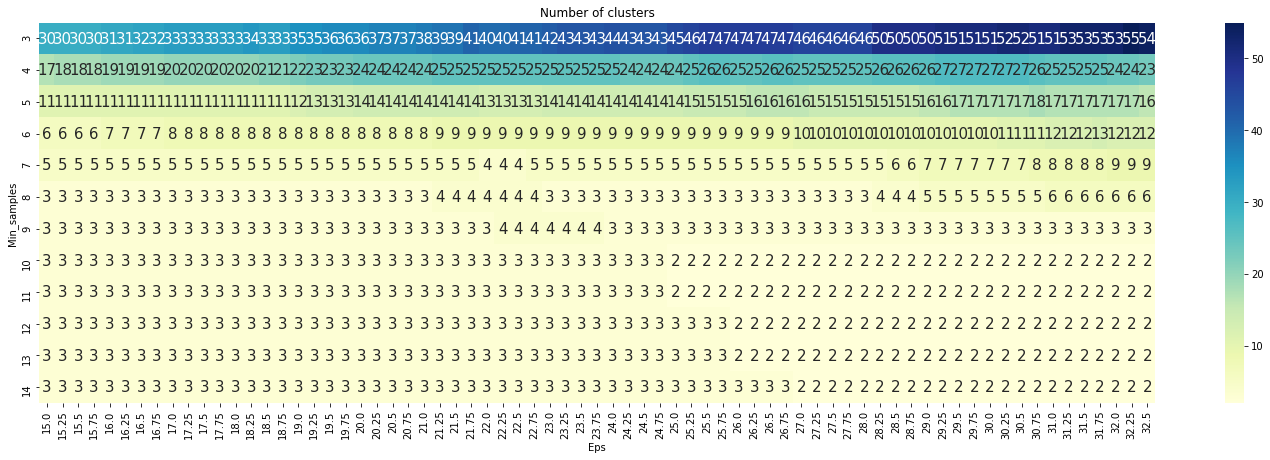

In [32]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(25,7))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 15}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

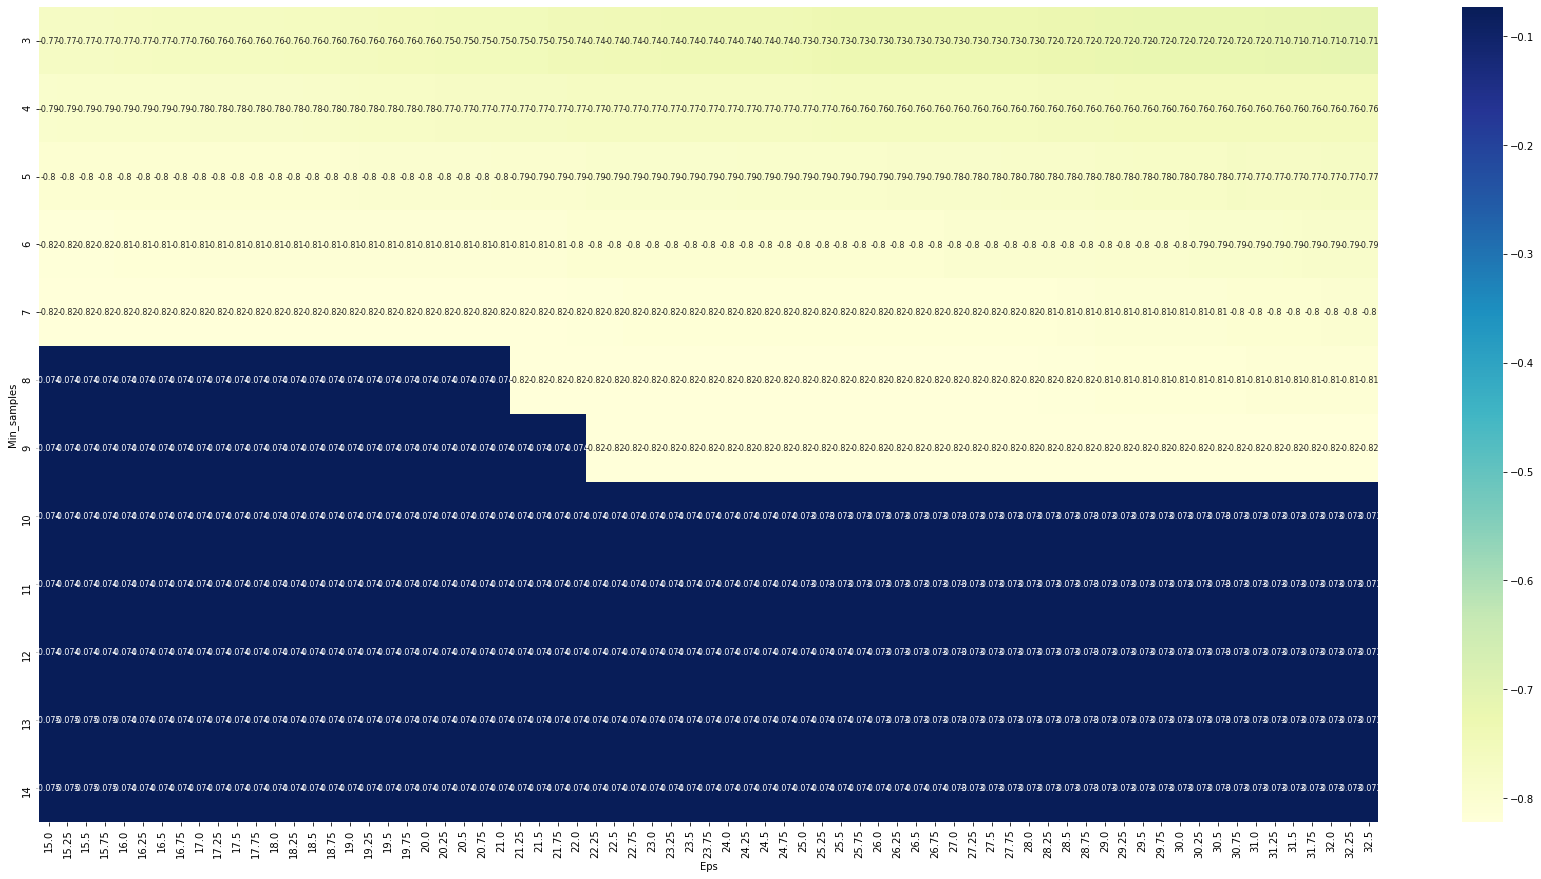

In [33]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(pivot_1, annot=True, annot_kws={"size":8}, cmap="YlGnBu", ax=ax)
plt.show()

In [34]:
DBS_clustering = DBSCAN(eps=15, min_samples=8).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [35]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes


,DBSCAN_size
Cluster,
-1,3540
0,19
1,102


After having a first contact with the data using DBSCAN seems the model is detecting most of the value points as outliers (cluster -1). That means I should try some scaling to see if the clustering gets better. 

## 2. Robust scaler
<a class="anchor" id="2"></a>

[^Index](#index)

Due to the fact that I have several outliers and values that range from 0 to millions I am thinking Robust Scaler might be a good method to use.

In [127]:
X_numerics = data[['Gross Loan Portfolio > Delinquency > One month or more',
                   'Number of active borrowers', 'Offices']]

In [128]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
X_numerics = RobustScaler().fit_transform(X_numerics)

In [129]:
X_numerics

array([[ 0.43473238,  0.72898502,  0.32075472],
       [ 0.71637067,  0.66422183,  0.33962264],
       [ 1.26331956,  0.360239  ,  0.33962264],
       ...,
       [-0.07861716, -0.21630555, -0.30188679],
       [-0.07919418, -0.13717272, -0.16981132],
       [-0.08016607, -0.16324265, -0.18867925]])

In [130]:
from itertools import product
eps_values = np.arange(12,20.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [131]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

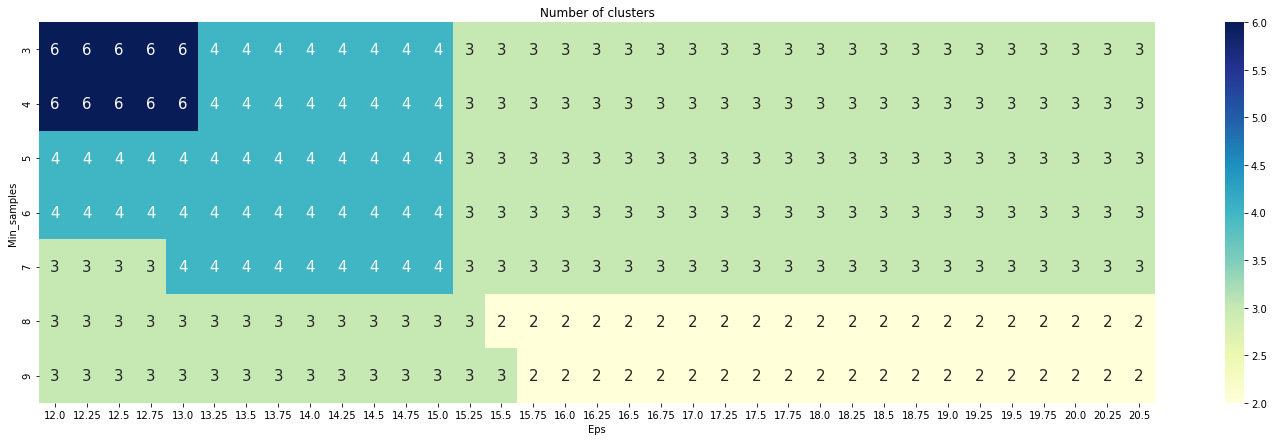

In [132]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(25,7))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 15}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

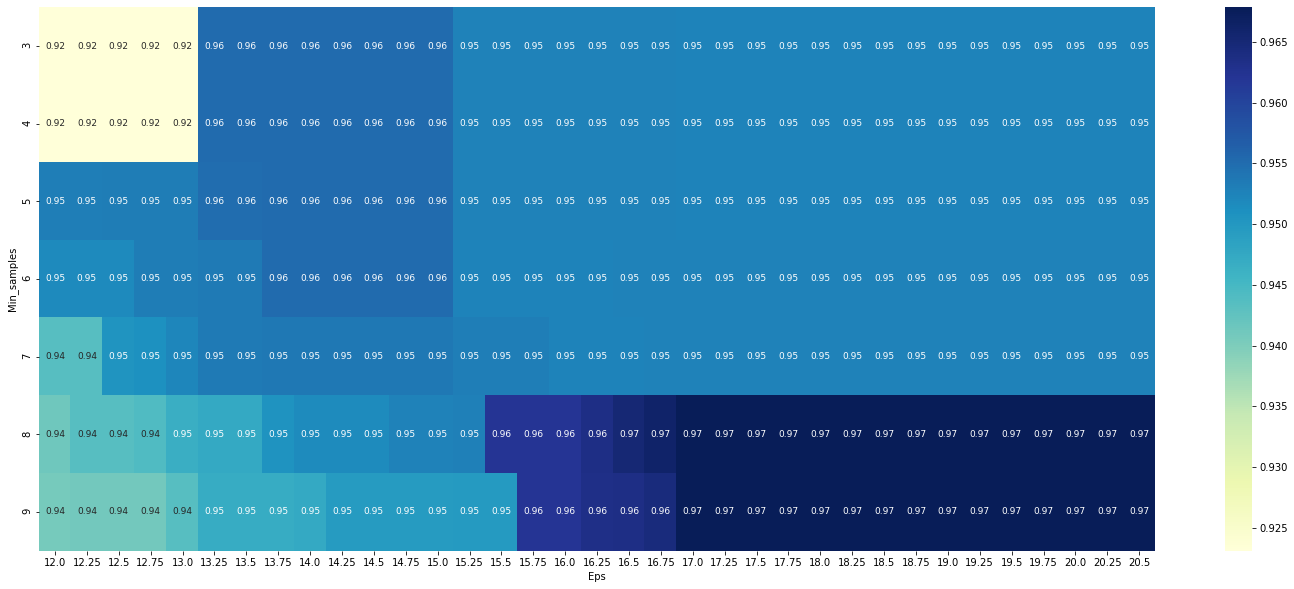

In [133]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(pivot_1, annot=True, annot_kws={"size":9}, cmap="YlGnBu", ax=ax)
plt.show()

In [134]:
X_numerics

array([[ 0.43473238,  0.72898502,  0.32075472],
       [ 0.71637067,  0.66422183,  0.33962264],
       [ 1.26331956,  0.360239  ,  0.33962264],
       ...,
       [-0.07861716, -0.21630555, -0.30188679],
       [-0.07919418, -0.13717272, -0.16981132],
       [-0.08016607, -0.16324265, -0.18867925]])

In [135]:
from sklearn.cluster import DBSCAN
DBS_clustering = DBSCAN(eps=13.25, min_samples=3).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered = pd.DataFrame(DBSCAN_clustered)
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [136]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,4
0,3625
1,25
2,7


In [137]:
DBSCAN_clustered

,0,1,2,Cluster
0,0.434732,0.728985,0.320755,0
1,0.716371,0.664222,0.339623,0
2,1.263320,0.360239,0.339623,0
3,2.034752,0.427684,0.396226,0
4,1.397976,0.362384,0.641509,0
...,...,...,...,...
3656,-0.040710,-0.104679,-0.188679,0
3657,0.932447,-0.056668,-0.150943,0
3658,-0.078617,-0.216306,-0.301887,0
3659,-0.079194,-0.137173,-0.169811,0


In [138]:
DBSCAN_clustered.rename(columns={0: 'Gross Loan Portfolio > Delinquency > One month or more', 
                                 1: 'Number of active borrowers', 2: 'Offices'}, inplace=True)

In [139]:
DBSCAN_clustered.head()

,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Cluster
0,0.434732,0.728985,0.320755,0
1,0.716371,0.664222,0.339623,0
2,1.263320,0.360239,0.339623,0
3,2.034752,0.427684,0.396226,0
4,1.397976,0.362384,0.641509,0


Seems like DBSCAN was the best way to find some behaviours on my data. It could classify it in 3 different groups and only detect as outliers 4 value points (which of course I will remove). To continue a bit with the analysis I am going to plot my 3 selected variables to see how they behave together.

## 3. Clusters' Visualization
<a class="anchor" id="3"></a>

[^Index](#index)

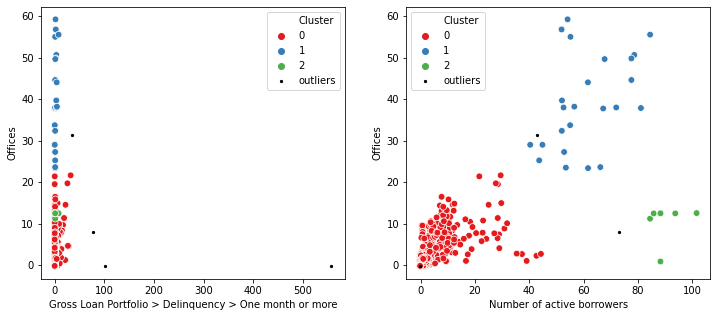

In [57]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Gross Loan Portfolio > Delinquency > One month or more', 'Offices',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Number of active borrowers', 'Offices',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Gross Loan Portfolio > Delinquency > One month or more'], outliers['Offices'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Number of active borrowers'], outliers['Offices'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [71]:
#I am removing the outliers from GLP
gross = DBSCAN_clustered[DBSCAN_clustered['Gross Loan Portfolio > Delinquency > One month or more'] < 34]

In [72]:
gross

,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Cluster
0,0.434732,0.728985,0.320755,0
1,0.716371,0.664222,0.339623,0
2,1.263320,0.360239,0.339623,0
3,2.034752,0.427684,0.396226,0
4,1.397976,0.362384,0.641509,0
...,...,...,...,...
3656,-0.040710,-0.104679,-0.188679,0
3657,0.932447,-0.056668,-0.150943,0
3658,-0.078617,-0.216306,-0.301887,0
3659,-0.079194,-0.137173,-0.169811,0


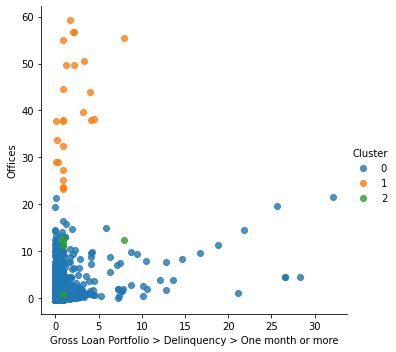

In [73]:
sns.lmplot(x='Gross Loan Portfolio > Delinquency > One month or more', y='Offices', data=gross,
           fit_reg=False, 
           hue='Cluster')   

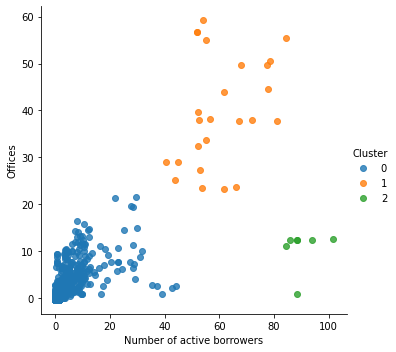

In [74]:
sns.lmplot(x='Number of active borrowers', y='Offices', data=gross,
           fit_reg=False, 
           hue='Cluster')  

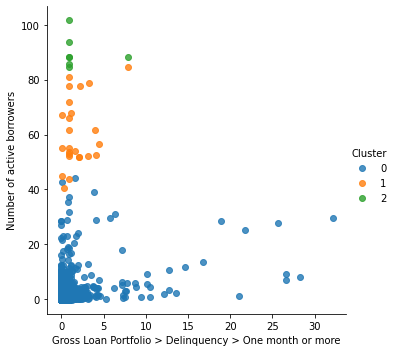

In [75]:
sns.lmplot(x='Gross Loan Portfolio > Delinquency > One month or more', y='Number of active borrowers', 
           data=gross, fit_reg=False, 
           hue='Cluster')  

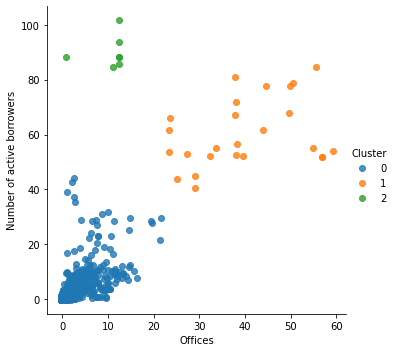

In [76]:
sns.lmplot(x='Offices', y='Number of active borrowers', 
           data=gross, fit_reg=False, 
           hue='Cluster')  

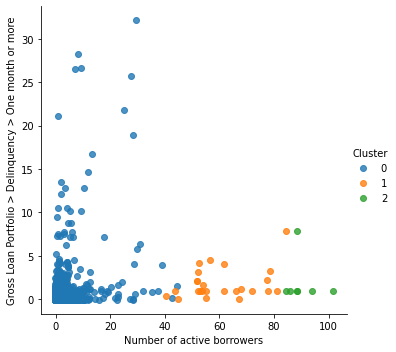

In [77]:
sns.lmplot(x='Number of active borrowers', y='Gross Loan Portfolio > Delinquency > One month or more', 
           data=gross, fit_reg=False, 
           hue='Cluster')  

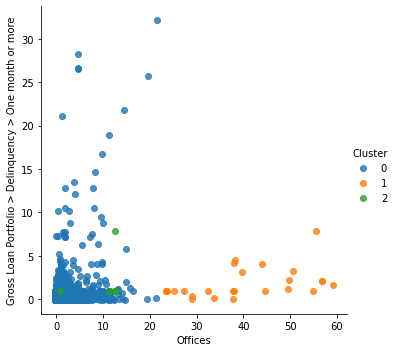

In [119]:
sns.lmplot(x='Offices', y='Gross Loan Portfolio > Delinquency > One month or more', 
           data=gross, fit_reg=False, 
           hue='Cluster')  

In [125]:
DBSCAN_clustered.head()

,0,1,2,Cluster
0,1.901875,0.523256,0.173624,0
1,2.609149,0.586379,0.299587,0
2,2.699360,0.636213,0.897059,0
3,2.701764,0.808970,1.777096,0
4,3.116381,0.980066,0.844291,0


In [141]:
DBSCAN_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Gross Loan Portfolio > Delinquency > One month or more  3661 non-null   float64
 1   Number of active borrowers                              3661 non-null   float64
 2   Offices                                                 3661 non-null   float64
 3   Cluster                                                 3661 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 114.5 KB


In [145]:
data['Cluster'] = DBSCAN_clustered ['Cluster']

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                3661 non-null   object 
 1   Fiscal Year                                             3661 non-null   int64  
 2   Average loan balance per borrower / GNI per capita      3661 non-null   float64
 3   Gross Loan Portfolio                                    3661 non-null   float64
 4   Gross Loan Portfolio > Delinquency > One month or more  3661 non-null   float64
 5   Number of active borrowers                              3661 non-null   float64
 6   Offices                                                 3661 non-null   float64
 7   Personnel                                               3661 non-null   float64
 8   Portfolio at risk > 30 days           

In [147]:
data.to_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/data_unsupervised.csv')